In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
# print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
imdb_data=pd.read_csv('/content/drive/MyDrive/IMDBDataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(49999, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
imdb_data['sentiment'].value_counts()

negative    25004
positive    24995
Name: sentiment, dtype: int64

In [4]:
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(9999,) (9999,)


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [7]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [8]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

In [9]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [10]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'hadn', 'their', "won't", 'those', 'am', "you've", 'against', 'were', 'until', 'any', "should've", 'you', 'above', 'more', 'ain', 'be', 'off', 'both', 'll', 'hers', 'if', 'y', "mightn't", 'on', 'over', "weren't", 'at', 'ma', 'my', 'or', "isn't", 'isn', 'wouldn', "doesn't", "mustn't", 've', 'which', 'doesn', "hadn't", 'haven', 'an', 'for', "you're", 'she', 'are', 'so', 'aren', 'wasn', 'now', 'me', 'himself', 'him', 'into', 'than', 'he', "couldn't", 'needn', 'has', 'in', 'd', 'having', 'who', 'didn', 'them', 'being', 'had', 'once', 'did', 'some', "aren't", 'further', 'below', 'have', 'between', 's', 'as', 'few', 'his', "hasn't", 'not', 'when', 'and', 'ours', "didn't", 'again', 'too', "shan't", 'with', 'ourselves', 'shouldn', "wouldn't", 'down', 'mightn', 'to', 'hasn', 'myself', 'out', 'by', 'that', "don't", 'yourselves', 'nor', "wasn't", 'after', "haven't", "shouldn't", "you'll", 'before', 'her', 'itself', 'can', 'was', 'then', 'what', 'themselves', 'of', 'do', 'a', 'such', 'how', 'thei

In [11]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [12]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [13]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 6203875)
BOW_cv_test: (9999, 6203875)


In [14]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6203875)
Tfidf_test: (9999, 6203875)


In [15]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(49999, 1)


In [16]:
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [17]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [18]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [19]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7463746374637463
lr_tfidf_score : 0.7456745674567457


In [20]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4997
    Negative       0.75      0.75      0.75      5002

    accuracy                           0.75      9999
   macro avg       0.75      0.75      0.75      9999
weighted avg       0.75      0.75      0.75      9999

              precision    recall  f1-score   support

    Positive       0.74      0.76      0.75      4997
    Negative       0.76      0.73      0.74      5002

    accuracy                           0.75      9999
   macro avg       0.75      0.75      0.75      9999
weighted avg       0.75      0.75      0.75      9999



In [23]:
import pickle

# Save the trained models to disk
with open('lr_bow_model.pkl', 'wb') as file:
    pickle.dump(lr_bow, file)

with open('lr_tfidf_model.pkl', 'wb') as file:
    pickle.dump(lr_tfidf, file)

# Load the trained models from disk
with open('lr_bow_model.pkl', 'rb') as file:
    loaded_lr_bow_model = pickle.load(file)

with open('lr_tfidf_model.pkl', 'rb') as file:
    loaded_lr_tfidf_model = pickle.load(file)

# Now you can use the loaded models for real-time inference on new data
def predict_sentiment_bow(model, text):
    # Preprocess the input text
    processed_text = denoise_text(text)
    processed_text = remove_special_characters(processed_text)
    processed_text = simple_stemmer(processed_text)
    processed_text = remove_stopwords(processed_text)

    # Transform the processed text using the CountVectorizer
    text_vector = cv.transform([processed_text])

    # Predict sentiment using the model
    sentiment_prediction = model.predict(text_vector)

    if sentiment_prediction[0] == 1:
        return 'Positive'
    else:
        return 'Negative'

def predict_sentiment_tfidf(model, text):
    # Preprocess the input text
    processed_text = denoise_text(text)
    processed_text = remove_special_characters(processed_text)
    processed_text = simple_stemmer(processed_text)
    processed_text = remove_stopwords(processed_text)

    # Transform the processed text using the TfidfVectorizer
    text_vector = tv.transform([processed_text])

    # Predict sentiment using the model
    sentiment_prediction = model.predict(text_vector)

    if sentiment_prediction[0] == 1:
        return 'Positive'
    else:
        return 'Negative'

# Example of real-time inference using the loaded models
new_text = "It was great movie"
predicted_sentiment_bow = predict_sentiment_bow(loaded_lr_bow_model, new_text)
predicted_sentiment_tfidf = predict_sentiment_tfidf(loaded_lr_tfidf_model, new_text)

print("Predicted Sentiment using BoW model:", predicted_sentiment_bow)
print("Predicted Sentiment using TF-IDF model:", predicted_sentiment_tfidf)


Predicted Sentiment using BoW model: Negative
Predicted Sentiment using TF-IDF model: Negative


<function matplotlib.pyplot.show(close=None, block=None)>

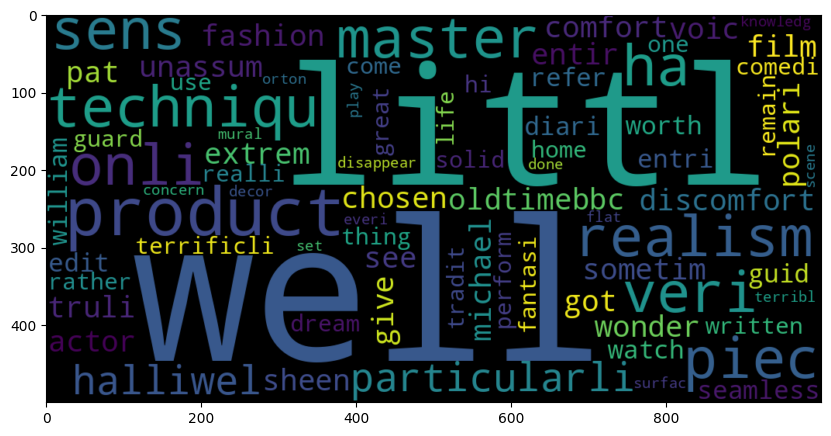

In [24]:
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)
[1 1 0 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [28]:
import pickle
from sklearn.naive_bayes import MultinomialNB

# Instantiate the MNB model
mnb = MultinomialNB()

# Fitting the MNB for Bag of Words
mnb_bow = mnb.fit(cv_train_reviews, train_sentiments)
print(mnb_bow)

# Fitting the MNB for TF-IDF features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

# Predicting using the MNB model for Bag of Words
mnb_bow_predict = mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

# Predicting using the MNB model for TF-IDF features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

# Calculate accuracy scores if needed
mnb_bow_score = accuracy_score(test_sentiments, mnb_bow_predict)
print("MNB Bag of Words Accuracy:", mnb_bow_score)
mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print("MNB TF-IDF Accuracy:", mnb_tfidf_score)

# Save the MNB models to disk
with open('mnb_bow_model.pkl', 'wb') as file:
    pickle.dump(mnb_bow, file)

with open('mnb_tfidf_model.pkl', 'wb') as file:
    pickle.dump(mnb_tfidf, file)

# Load the MNB models from disk
with open('mnb_bow_model.pkl', 'rb') as file:
    loaded_mnb_bow_model = pickle.load(file)

with open('mnb_tfidf_model.pkl', 'rb') as file:
    loaded_mnb_tfidf_model = pickle.load(file)

# Now you can use the loaded MNB models for real-time inference on new data
def predict_sentiment_mnb_bow(model, text):
    # Preprocess the input text
    processed_text = denoise_text(text)
    processed_text = remove_special_characters(processed_text)
    processed_text = simple_stemmer(processed_text)
    processed_text = remove_stopwords(processed_text)

    # Transform the processed text using the CountVectorizer
    text_vector = cv.transform([processed_text])

    # Predict sentiment using the model
    sentiment_prediction = model.predict(text_vector)

    if sentiment_prediction[0] == 1:
        return 'Positive'
    else:
        return 'Negative'

def predict_sentiment_mnb_tfidf(model, text):
    # Preprocess the input text
    processed_text = denoise_text(text)
    processed_text = remove_special_characters(processed_text)
    processed_text = simple_stemmer(processed_text)
    processed_text = remove_stopwords(processed_text)

    # Transform the processed text using the TfidfVectorizer
    text_vector = tv.transform([processed_text])

    # Predict sentiment using the model
    sentiment_prediction = model.predict(text_vector)

    if sentiment_prediction[0] == 1:
        return 'Positive'
    else:
        return 'Negative'

# Example of real-time inference using the loaded MNB models
new_text = "I was bad watching this movie"
predicted_sentiment_mnb_bow = predict_sentiment_mnb_bow(loaded_mnb_bow_model, new_text)
predicted_sentiment_mnb_tfidf = predict_sentiment_mnb_tfidf(loaded_mnb_tfidf_model, new_text)

print("Predicted Sentiment using MNB and BoW:", predicted_sentiment_mnb_bow)
print("Predicted Sentiment using MNB and TF-IDF:", predicted_sentiment_mnb_tfidf)


MultinomialNB()
MultinomialNB()
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
MNB Bag of Words Accuracy: 0.7461746174617462
MNB TF-IDF Accuracy: 0.7458745874587459
Predicted Sentiment using MNB and BoW: Negative
Predicted Sentiment using MNB and TF-IDF: Negative


In [29]:
import pickle

# Save the trained models to disk
with open('svm_bow_model.pkl', 'wb') as file:
    pickle.dump(svm_bow, file)

with open('svm_tfidf_model.pkl', 'wb') as file:
    pickle.dump(svm_tfidf, file)

# Load the trained models from disk
with open('svm_bow_model.pkl', 'rb') as file:
    loaded_svm_bow_model = pickle.load(file)

with open('svm_tfidf_model.pkl', 'rb') as file:
    loaded_svm_tfidf_model = pickle.load(file)

# Now you can use the loaded SVM models for real-time inference on new data
def predict_sentiment_svm_bow(model, text):
    # Preprocess the input text
    processed_text = denoise_text(text)
    processed_text = remove_special_characters(processed_text)
    processed_text = simple_stemmer(processed_text)
    processed_text = remove_stopwords(processed_text)

    # Transform the processed text using the CountVectorizer
    text_vector = cv.transform([processed_text])

    # Predict sentiment using the model
    sentiment_prediction = model.predict(text_vector)

    if sentiment_prediction[0] == 1:
        return 'Positive'
    else:
        return 'Negative'

def predict_sentiment_svm_tfidf(model, text):
    # Preprocess the input text
    processed_text = denoise_text(text)
    processed_text = remove_special_characters(processed_text)
    processed_text = simple_stemmer(processed_text)
    processed_text = remove_stopwords(processed_text)

    # Transform the processed text using the TfidfVectorizer
    text_vector = tv.transform([processed_text])

    # Predict sentiment using the model
    sentiment_prediction = model.predict(text_vector)

    if sentiment_prediction[0] == 1:
        return 'Positive'
    else:
        return 'Negative'

# Example of real-time inference using the loaded SVM models
new_text = "it was not good!"
predicted_sentiment_svm_bow = predict_sentiment_svm_bow(loaded_svm_bow_model, new_text)
predicted_sentiment_svm_tfidf = predict_sentiment_svm_tfidf(loaded_svm_tfidf_model, new_text)

print("Predicted Sentiment using SVM and BoW:", predicted_sentiment_svm_bow)
print("Predicted Sentiment using SVM and TF-IDF:", predicted_sentiment_svm_tfidf)


Predicted Sentiment using SVM and BoW: Positive
Predicted Sentiment using SVM and TF-IDF: Positive


In [30]:
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

mnb_bow_predict=mnb.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

MultinomialNB()
MultinomialNB()
[1 1 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [31]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [32]:
import pickle

# Save the trained models to disk
with open('lr_bow_model.pkl', 'wb') as file:
    pickle.dump(lr_bow, file)

with open('lr_tfidf_model.pkl', 'wb') as file:
    pickle.dump(lr_tfidf, file)

with open('svm_bow_model.pkl', 'wb') as file:
    pickle.dump(svm_bow, file)

with open('svm_tfidf_model.pkl', 'wb') as file:
    pickle.dump(svm_tfidf, file)

with open('mnb_bow_model.pkl', 'wb') as file:
    pickle.dump(mnb_bow, file)

with open('mnb_tfidf_model.pkl', 'wb') as file:
    pickle.dump(mnb_tfidf, file)

# Load the trained models from disk
with open('lr_bow_model.pkl', 'rb') as file:
    loaded_lr_bow_model = pickle.load(file)

with open('lr_tfidf_model.pkl', 'rb') as file:
    loaded_lr_tfidf_model = pickle.load(file)

with open('svm_bow_model.pkl', 'rb') as file:
    loaded_svm_bow_model = pickle.load(file)

with open('svm_tfidf_model.pkl', 'rb') as file:
    loaded_svm_tfidf_model = pickle.load(file)

with open('mnb_bow_model.pkl', 'rb') as file:
    loaded_mnb_bow_model = pickle.load(file)

with open('mnb_tfidf_model.pkl', 'rb') as file:
    loaded_mnb_tfidf_model = pickle.load(file)

# Now you can use the loaded models for real-time inference on new data
# (Code for predict_sentiment functions)

# Example of real-time inference using the loaded models
new_text = "I really enjoyed watching this movie. The acting was great!"
predicted_sentiment_lr_bow = predict_sentiment_bow(loaded_lr_bow_model, new_text)
predicted_sentiment_lr_tfidf = predict_sentiment_tfidf(loaded_lr_tfidf_model, new_text)
predicted_sentiment_svm_bow = predict_sentiment_svm_bow(loaded_svm_bow_model, new_text)
predicted_sentiment_svm_tfidf = predict_sentiment_svm_tfidf(loaded_svm_tfidf_model, new_text)
predicted_sentiment_mnb_bow = predict_sentiment_mnb_bow(loaded_mnb_bow_model, new_text)
predicted_sentiment_mnb_tfidf = predict_sentiment_mnb_tfidf(loaded_mnb_tfidf_model, new_text)

print("Predicted Sentiment using Logistic Regression and BoW:", predicted_sentiment_lr_bow)
print("Predicted Sentiment using Logistic Regression and TF-IDF:", predicted_sentiment_lr_tfidf)
print("Predicted Sentiment using SVM and BoW:", predicted_sentiment_svm_bow)
print("Predicted Sentiment using SVM and TF-IDF:", predicted_sentiment_svm_tfidf)
print("Predicted Sentiment using MNB and BoW:", predicted_sentiment_mnb_bow)
print("Predicted Sentiment using MNB and TF-IDF:", predicted_sentiment_mnb_tfidf)


Predicted Sentiment using Logistic Regression and BoW: Negative
Predicted Sentiment using Logistic Regression and TF-IDF: Negative
Predicted Sentiment using SVM and BoW: Positive
Predicted Sentiment using SVM and TF-IDF: Positive
Predicted Sentiment using MNB and BoW: Negative
Predicted Sentiment using MNB and TF-IDF: Negative


In [ ]:
#the results of the above are not accurate so we will try another approch


In [1]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from keras.layers import Dense, LSTM,Embedding, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts

In [25]:
#loading data from csv file
data=pd.read_csv('/content/drive/MyDrive/IMDBDataset.csv')

In [26]:
#showing columne
data.columns

Index(['review', 'sentiment'], dtype='object')

In [27]:
#text preprocrdding for text classfication
def normalized_text(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

normalized=lambda x:normalized_text(x)#cleaned1

In [28]:
#applying preprocessing to loaded dataset
data['review']=pd.DataFrame(data.review.apply(normalized))


In [29]:
#removing certain characters from the input text.
def preprocess(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

processed=lambda x:preprocess(x)

In [33]:
#applied preprocessing on data
data['review']=pd.DataFrame(data.review.apply(processed))


In [34]:
#slecting predictor and response
x = data.iloc[0:,0].values
y = data.iloc[0:,1].values

In [35]:
#spliiting  the data for testing and training
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.25,random_state = 42)


In [52]:
#TfidfVectorizer  contians text processing techniques such as tokeninzaiotn
#Term Frequency
#Inverse Document Frequency (IDF)
tf = TfidfVectorizer()
print(tf)
from sklearn.pipeline import Pipeline

TfidfVectorizer()


In [38]:
#perform text classification using the TF-IDF vectorizer and a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model=Pipeline([('vectorizer',tf),('classifier',classifier)])

model.fit(xtrain,ytrain)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [39]:
#ypred to assign predicted response
ypred=model.predict(xtest)

In [18]:
# model score
accuracy_score(ypred,ytest)

0.89224

In [19]:
# confusion matrix
c_matrix=confusion_matrix(ytest,ypred)
print(c_matrix)

[[5538  731]
 [ 616 5615]]


In [21]:
# f1 score

recall=c_matrix[0][0]/(c_matrix[0][0]+c_matrix[1][0])
precision=c_matrix[0][0]/(c_matrix[0][0]+c_matrix[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.8915720840376721


In [40]:
def predict_sentiment(sentence):
    preprocessed_sentence = preprocess(normalized_text(sentence))
    predicted_sentiment = model.predict([preprocessed_sentence])
    return predicted_sentiment[0]

# Test the function with an example sentence
example_sentence = "It was a good movie."
predicted_sentiment = predict_sentiment(example_sentence)
print("Predicted Sentiment:", predicted_sentiment)

Predicted Sentiment: positive


In [58]:
#saving the model for pickle pile
import pickle

# Save the model weights
pickle.dump(model, open('model.pkl', 'wb'))

In [59]:
import pickle

# Load the model
model = pickle.load(open('model.pkl', 'rb'))

# Predict the sentiment of a new sentence
sentence = "It was a good movie."
preprocessed_sentence = preprocess(normalized_text(sentence))
predicted_sentiment = model.predict([preprocessed_sentence])

# Print the predicted sentiment
print("Predicted sentiment:", predicted_sentiment[0])


Predicted sentiment: positive


In [61]:
import pickle
import re
def preprocess(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
def normalized_text(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

normalized=lambda x:normalized_text(x)#cleaned1
# Load the model
model = pickle.load(open('model.pkl', 'rb'))

# Predict the sentiment of a new sentence
sentence = "It was a good movie."
preprocessed_sentence = preprocess(normalized_text(sentence))
predicted_sentiment = model.predict([preprocessed_sentence])

# Print the predicted sentiment
print("Predicted sentiment:", predicted_sentiment[0])

Predicted sentiment: positive


In [62]:
%cp /content/model.pkl /content/drive/MyDrive/sentiment.pkl